<a href="https://colab.research.google.com/github/Riaven/Colab/blob/master/Datos_trabajo_An%C3%A1lisis_usando_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configuración inicial

Se aplica la configuración inicial del proyecto y se importan las librerías correspondientes, para el correcto funcionamiento del entorno

<hr>

PD: Fui probando con algunos modelos y con los siguientes obtuve datos positivos, **algunos dieron error así que por lo mismo no están**, todos los siguientes dieron datos más coherentes.

Son un total, de *24 modelos* que están analizando la Data, iba a poner 8 en un principio, pero es interesante ver como pueden actuar tan diferente cada modelo, con una misma data.


In [367]:
# Impedimos que los gráficos se abran en ventanas emergentes
%pylab inline
#Importamos librerías básicas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Cambio de la presición con la que trabajaremos
pd.set_option('precision', 5)

#Importamos la librería que nos permitirá preparar los datos
from sklearn import preprocessing

#Vamos a dividir los datos de prueba
from sklearn.model_selection import  train_test_split # este último permite separar la data con porcentajes

# Implementamos modelos de machine learning
# SOLO MODELOS DE CLASIFICACIÓN
from sklearn.tree import DecisionTreeClassifier
#Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
#Naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
#ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
#Discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# modelos svm
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
#Linear models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier

Populating the interactive namespace from numpy and matplotlib


#Analizando el CSV

Usamos `read_csv()` y tomamos la dirección desde la carpeta *Drive* correspondiente, podemos observar que los datos se encuentran separados por una línea vertical `|`

In [368]:
datos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CSV/datos-trabajo.csv', sep='|')
datos

,Nombre,Apellido,edad,estado_civil,cant_hijos,genero,compro_bici
0,Bell,Gross,26,1,0,1,1
1,Ira,Fleming,31,1,4,1,0
2,Brian,Sloan,46,3,1,1,1
3,Matthew,Banks,47,3,0,2,1
4,Kibo,Burns,19,3,1,2,0
...,...,...,...,...,...,...,...
495,Willa,Cannon,52,1,1,2,1
496,Caesar,House,48,2,2,1,0
497,Griffith,Rogers,27,2,1,2,0
498,Ignatius,Slater,44,2,4,2,1


Debemos tener en cuenta que :

`Estado_civil`: 
- 1 = soltero
- 2 = casado
-  3 = divorciado


`Genero`:
- 1 = hombre
- 2 = mujer


`Compro_bici`:
- 1 = compro en el periodo anterior
- 0 = cliente nuevo y no compro en el periodo anterior.

#Mirando información de los datos



In [369]:
print(datos.shape)#cantidad de columnas y filas
print(datos.head(5)) # mostramos los primeros 5 registros de la data
print(datos.info()) # columnas, con sus respectivos tipos de datos, nótese que los numeros se encuentran en int
print(datos.describe()) # resumen de los datos, mendia, minima, máxima, etc
print(datos.groupby('compro_bici').size()) # agrupamos por las personas que compraron y las que no

(500, 7)
    Nombre Apellido  edad  estado_civil  cant_hijos  genero  compro_bici
0     Bell    Gross    26             1           0       1            1
1      Ira  Fleming    31             1           4       1            0
2    Brian    Sloan    46             3           1       1            1
3  Matthew    Banks    47             3           0       2            1
4     Kibo    Burns    19             3           1       2            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Nombre        500 non-null    object
 1   Apellido      500 non-null    object
 2   edad          500 non-null    int64 
 3   estado_civil  500 non-null    int64 
 4   cant_hijos    500 non-null    int64 
 5   genero        500 non-null    int64 
 6   compro_bici   500 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 27.5+ KB
None
            eda

#Cambiamos datos

Se debe de tener en cuenta que los modelos trabajan mejor si es que el tipo de dato que utilizan en de tipo `float`, por lo mismo se tendrá que cambiar los datos correspondientes

In [0]:
datos_f = datos[['edad', 'estado_civil', 'cant_hijos', 'genero', 'compro_bici']].astype(float)#tomamos las columnas y las pasamos a float

Ya con los datos formateados a float, miramos la correlación de los datos, con el gráfico de **mapa de calor**

In [371]:
datos_f.corr() # mostramos la correlación de los datos en una tabla

,edad,estado_civil,cant_hijos,genero,compro_bici
edad,1.00000,0.01914,-0.07613,0.05594,-0.00264
estado_civil,0.01914,1.00000,-0.02094,0.05449,0.09199
cant_hijos,-0.07613,-0.02094,1.00000,-0.06688,-0.02178
genero,0.05594,0.05449,-0.06688,1.00000,0.04898
compro_bici,-0.00264,0.09199,-0.02178,0.04898,1.00000


Mostramos los mismos datos de arriab pero con un `heatmap()`

"\nxticklabels=1, \nyticklabels=1,\n\nNos ayudan a 'obligar' al gráfico a mostrar TODOS los datos, esto es útil si es que hubieran muchos datos en juego (como en el caso del mapa de Covid)\n"

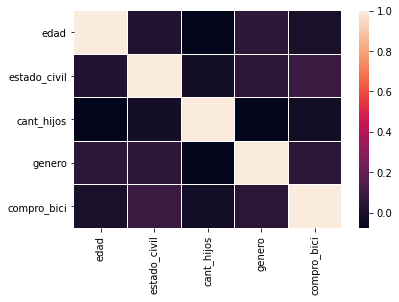

In [372]:
sns.heatmap(
    datos_f.corr(),# Los datos son los de la correlación
    xticklabels=1, 
    yticklabels=1,
    linewidths=0.1, # pone una línea entre cada uno de los cuadros, lo hace más fácil de diferenciar
    linecolor='white' # ayuda a diferenciar, entre los cuadros, bastante útil al tener muchas columnas
)

'''
xticklabels=1, 
yticklabels=1,

Nos ayudan a 'obligar' al gráfico a mostrar TODOS los datos, esto es útil si es que hubieran muchos datos en juego (como en el caso del mapa de Covid)
'''

#Trabajando los datos

Escogiendo los porcentajes de datos a ocupar, como entrenamiendo  y prueba

Se crea una variable que almacena todos los datos que queremos buscar

In [0]:
caracteristicas = [ 'edad','estado_civil', 'cant_hijos', 'genero'] #'edad','estado_civil', 'cant_hijos', 'genero'

In [374]:
data = datos_f[caracteristicas] # los datos, sin comprar bici 
clas = datos_f['compro_bici'] #Clasificación de acuerdo si compro o no
print(data, clas)

     edad  estado_civil  cant_hijos  genero
0    26.0           1.0         0.0     1.0
1    31.0           1.0         4.0     1.0
2    46.0           3.0         1.0     1.0
3    47.0           3.0         0.0     2.0
4    19.0           3.0         1.0     2.0
..    ...           ...         ...     ...
495  52.0           1.0         1.0     2.0
496  48.0           2.0         2.0     1.0
497  27.0           2.0         1.0     2.0
498  44.0           2.0         4.0     2.0
499  47.0           2.0         0.0     2.0

[500 rows x 4 columns] 0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
495    1.0
496    0.0
497    0.0
498    1.0
499    1.0
Name: compro_bici, Length: 500, dtype: float64


In [0]:
data_entrenamiento, data_prueba, clasi_entrenamiento, clasi_prueba = train_test_split(
    data,
    clas,
    train_size = 0.75,
    test_size = 0.25
)

Miraremos los datos que tenemos para las pruebas y entrenamiento

In [376]:
print('Los datos usados para entrenamiendo serán {} : {}'.format(
    data_entrenamiento.shape,
    clasi_entrenamiento.shape
))
print('Los datos usados para pruebas serán {} : {}'.format(
    data_prueba.shape,
    clasi_prueba.shape
))

Los datos usados para entrenamiendo serán (375, 4) : (375,)
Los datos usados para pruebas serán (125, 4) : (125,)


#Comparando cada modelo

Con los datos para las pruebas y entrenamiendo, procederemos a usarlas para visualizar cual es el modelo de predicción que se acerca más a un resultado óptimo

In [377]:
modelos = []
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos.append(('NearestCentroid', NearestCentroid()))
modelos.append(('GaussianNB', GaussianNB()))
modelos.append(('MultinomialNB', MultinomialNB()))
modelos.append(('ComplementNB', ComplementNB()))
modelos.append(('BernoulliNB', BernoulliNB()))
modelos.append(('AdaBoostClassifier', AdaBoostClassifier()))
modelos.append(('BaggingClassifier', BaggingClassifier()))
modelos.append(('ExtraTreesClassifier', ExtraTreesClassifier()))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
modelos.append(('RandomForestClassifier', RandomForestClassifier()))
modelos.append(('MLPClassifier', MLPClassifier()))
modelos.append(('GaussianProcessClassifier', GaussianProcessClassifier()))
modelos.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
modelos.append(('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()))
modelos.append(('NuSVC', NuSVC()))
modelos.append(('SVC', SVC()))
modelos.append(('LinearSVC', LinearSVC()))
modelos.append(('LogisticRegression', LogisticRegression()))
modelos.append(('RidgeClassifier', RidgeClassifier()))
modelos.append(('SGDClassifier', SGDClassifier()))
modelos.append(('Perceptron', Perceptron()))
modelos.append(('PassiveAggressiveClassifier', PassiveAggressiveClassifier()))

#En mi caso crearé un DataFrame, para visualizar de mejor manera los porcentajes de cada uno de los modelos
resultados_dt = pd.DataFrame(columns = ['Nombre_Modelo', 'Porcentaje_Precisión'])

for nom, model in modelos:
  model.fit(data_entrenamiento, clasi_entrenamiento)
  resultado = model.score(data_prueba, clasi_prueba)
  porcentaje = resultado * 100
  #Añadimos los datos al DataFrame que creamos, así visualizamos mejor los datos
  resultados_dt = resultados_dt.append({'Nombre_Modelo': nom, 'Porcentaje_Precisión' : porcentaje}, ignore_index=True)
  #Imprimimos de todas maneras para verlo, pero a veces salen líneas intermedias que molestan
  print('El modelo {modelo}, tiene una presición de {presi:.3f}%'.format(
      modelo = nom,
      presi = porcentaje
  ))


El modelo DecisionTreeClassifier, tiene una presición de 62.400%
El modelo KNeighborsClassifier, tiene una presición de 56.000%
El modelo NearestCentroid, tiene una presición de 42.400%
El modelo GaussianNB, tiene una presición de 51.200%
El modelo MultinomialNB, tiene una presición de 46.400%
El modelo ComplementNB, tiene una presición de 47.200%
El modelo BernoulliNB, tiene una presición de 40.800%
El modelo AdaBoostClassifier, tiene una presición de 59.200%
El modelo BaggingClassifier, tiene una presición de 57.600%
El modelo ExtraTreesClassifier, tiene una presición de 60.000%
El modelo GradientBoostingClassifier, tiene una presición de 59.200%
El modelo RandomForestClassifier, tiene una presición de 60.000%
El modelo MLPClassifier, tiene una presición de 44.800%
El modelo GaussianProcessClassifier, tiene una presición de 53.600%
El modelo LinearDiscriminantAnalysis, tiene una presición de 49.600%
El modelo QuadraticDiscriminantAnalysis, tiene una presición de 52.000%
El modelo NuS

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [378]:
resultados_dt # Imprimimos el DataFrame, como se puede apreciar la visualización de los datos es notablemente mejor, además podemos ver el índice de inmediato

,Nombre_Modelo,Porcentaje_Precisión
0,DecisionTreeClassifier,62.4
1,KNeighborsClassifier,56.0
2,NearestCentroid,42.4
3,GaussianNB,51.2
4,MultinomialNB,46.4
5,ComplementNB,47.2
6,BernoulliNB,40.8
7,AdaBoostClassifier,59.2
8,BaggingClassifier,57.6
9,ExtraTreesClassifier,60.0


#Elegimos modelo

<font color = 'green'> **El primer modelo DTC es uno de los que tiene más presición con un porcentaje de 62.4%** </font>


> <font color = 'red'> **ESTE MODELO TIENE UNA PROBABILIDAD DE UN 37.6% DE FALLAR SU PREDICCIÓN** </font>


**Captura de prueba, ya que en caso de volverse a ejecutar este resultado puede variar y por lo mismo puede que OTRO MODELO tenga un mejor porcentaje de presición en ese momento**

![capturamodelo](https://i.stack.imgur.com/un8V3.png)


Elegimos el Modelo `DecisionTreeClassifier`

In [388]:
modelo_final = modelos[0][1] # buscamos la posición en que se encuentra, y sacamos su instancia para usarla :)
modelo_final # imprimimos para ver que elegimos la instancia que queriamos

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Probamos predecir con el modelo

In [389]:
prediccion = modelo_final.predict(data_prueba) # Usamos la data de prueba para ver como se comporta el modelo
print(prediccion) # imprimimos la predicción para visualizar

[0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0.]


Probamos con datos individuales

In [390]:
 modelo_final.predict([[52, 3, 1, 2]]) #Probamos con datos random, para ver si es que el modelo funciona

array([1.])

Mostramos con los datos reales

In [400]:
for id in range(datos.shape[0]): # for para recorrer los datos reales
  persona = datos.iloc[id] # sacamos la fila completa, así tenemos todos los datos de cada persona
  #Predecimos con el modelo final, entregando como parámetro las columnas correspondientes de las personas
  pred = modelo_final.predict([persona[caracteristicas]]) # Hacemos la bendida predicción :OO
  #print('{} : {}'.format(pred, persona.Nombre)) #PRUEBA PARA VER QUE LOS DATOS CORRESPONDEN CON LO QUE SE IMPRIME
  genero = persona.genero == 1 and 'El señor' or 'La señorita' # veremos el género de nuestro sujeto, no se nos vaya a ofender :o
  gen = persona.genero == 1 and 'o' or 'a' # aquí igual, pero es para la siguiente línea, look 
  # aquí veremos que mensaje corresponde dependiendo de la predicción y del género de nuestro sujeto :o
  # Aunque el género y el nombre a veces como que no junta ni pega :/
  compra = pred == 1 and '"Si pudiera estar interesad{} en esta campaña"'.format(gen) or '"No podría estar interesad{} en esta campaña"'.format(gen)# tomé literal lo de las comillas ¬_¬ por que quién sabe pues
  #Imprimimos todo bonito :)
  print('{gen} {nom} {ap} en base a sus características {presenta}'.format(
      #Variables a cambiar dentro del texto
      gen = genero,
      nom = persona.Nombre,
      ap = persona.Apellido,
      presenta = compra
  ))

 

El señor Bell Gross en base a sus características "Si pudiera estar interesado en esta campaña"
El señor Ira Fleming en base a sus características "Si pudiera estar interesado en esta campaña"
El señor Brian Sloan en base a sus características "Si pudiera estar interesado en esta campaña"
La señorita Matthew Banks en base a sus características "Si pudiera estar interesada en esta campaña"
La señorita Kibo Burns en base a sus características "Si pudiera estar interesada en esta campaña"
El señor Fritz Wright en base a sus características "Si pudiera estar interesado en esta campaña"
El señor Idola Porter en base a sus características "Si pudiera estar interesado en esta campaña"
El señor Walker Cervantes en base a sus características "Si pudiera estar interesado en esta campaña"
El señor Reese Steele en base a sus características "No podría estar interesado en esta campaña"
La señorita Kibo Rivers en base a sus características "Si pudiera estar interesada en esta campaña"
El señor Tatia